### Используя схему бегущего счета и итерационные методы, решить задачу:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
display(Math(r'\frac{\partial u}{\partial t}-\frac{2u}{1+(1+u^2)^2}\frac{\partial u}{\partial x}=0,  -1\leq x <0,'))
display(Math(r'u(x,0)=x^2+1,'))
display(Math(r'u(0,t)=e^{-t}.'))
#$\frac{\partial f}{\partial x}$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Сделаем замену переменных s=-x и будет решать задачу на отрезке [0,1]:

In [3]:
display(Math(r'\frac{\partial u}{\partial t}+\frac{2u}{1+(1+u^2)^2}\frac{\partial u}{\partial s}=0,  0\leq s <1,'))
display(Math(r'u(y,0)=s^2+1,'))
display(Math(r'u(0,t)=e^{-t}.'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Перепишем уравнение в эвивалентном виде:

In [4]:
display(Math(r'\int{\frac{2u}{1+(1+u^2)^2}}du=arctan(1+u^2)+C'))

<IPython.core.display.Math object>

In [5]:
display(Math(r'\frac{\partial u}{\partial t}+\frac{\partial (arctan(1+u^2)+C)}{\partial s}=0,  0\leq s <1,'))
display(Math(r'u(s,0)=s^2+1,'))
display(Math(r'u(0,t)=e^{-t}.'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Построение характеристик:

In [6]:
display(Math(r'\frac{dt}{1}=\frac{ds}{\frac{2u}{1+(1+u^2)^2}}=\frac{du}{0}'))

<IPython.core.display.Math object>

In [7]:
display(Math(r'u=const=u*'))
display(Math(r'dt=\frac{1+(1+u^2)^2}{2u}ds'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
display(Math(r't-t_0=\frac{1+(1+u^2)^2}{2u}(s-s_0)'))

<IPython.core.display.Math object>

In [9]:
display(Math(r's_0=0 => u*=e^{-t_0} => t=t_0+\frac{1+(1+e^{-2t_0})^2}{2e^{-t_0}}s'))
display(Math(r't_0=0 => u*=s_0^2+1 => t=\frac{1+(4+s_0^8+8s_0^4+4s_0^6+8s_0^2)}{2(1+s_0^2)}(s-s_0)'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Получаем, что для первых и вторых характеристик при t0=0 и x0=0 соотвественно:

In [10]:
display(Math(r't=\frac{5}{2}s'))
display(Math(r't=\frac{5}{2}s'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Построим полученные характеристики на плоскости (t,x):

<IPython.core.display.Javascript object>


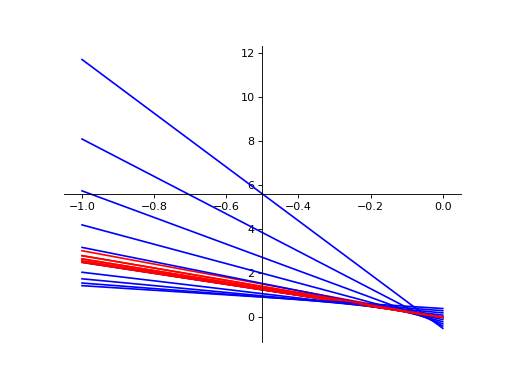

In [108]:
# fig=plt.figure(figsize=(10,20))

x = np.linspace(-1,0,100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# ax.yaxis.set_label('ffdf')
t0=[]
s0=[]
k=0
for i in range(-5,5):
    t0.append(0.1*i)
    s0.append(0.1*i)
    t1 = t0[k]+(1+(1+np.exp(-2*t0[k]))**2)/2/np.exp(t0[k])*(-x)
    t2 = (5+s0[k]**8+8*s0[k]**4+4*s0[k]**6+8*s0[k]**2)/(1+s0[k]**2)/2*(-x)
    k=k+1
    plt.plot(x,t1, 'b', label='')
    plt.plot(x,t2, 'r', label='')

### Выберем неявный трехточечный шаблон для схемы бегущего счета (он дает гладкий профиль в отличие от 4х точечного)

In [96]:
# Шаблон
display(Math(r'\frac{y_{m,n+1}-y_{m,n}}{\tau}+c\frac{y_{m,n+1}-y_{m-1,n+1}}{h}=f_{m,n+1}'))

<IPython.core.display.Math object>

### Данная схема является абсолютно устойчивой ( т.к. это неявный шаблон). Можно показать, что данная схема имеет 1й порядок точности:

In [103]:
display(Math(r'y_{m,n+1}=y_{m,n}+\frac{\partial y_{m,n}} {\partial \tau} \tau +O(\tau^2)'))
display(Math(r'y_{m-1,n+1}=y_{m,n}-\frac{\partial y_{m,n}} {\partial x}h +\frac{\partial y_{m,n}} {\partial \tau} \tau +O(\tau^2)+O(h^2)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### То есть, после сокращений имеем первый порядок точности.

###  Параметры сетки: 

In [109]:
N=100 # число шагов по s
M=1000 # число шагов по t
S=1 # размер пространственного отрезка
T=10 # размер временного отрезка
h=X/N # шаг по пространству
tau=T/M # шаг по времени

In [110]:
y=np.zeros((N,M),dtype=float) # массив для заполнения функцией решения
s, t = np.linspace(0, S, N), np.linspace(0, T, M)
eps=0.01 # невязка

### Начальные и граничные условия:

In [111]:
y[0,:]=np.exp(-t) 
y[:,0]=s**2+1

### Осовные функции:

In [64]:
def func(x):
    return np.arctan(1+x**2)

def Dfunc(x):
    return 2*x/(1+(1+x**2)**2)

def f(a,b,x):
    return (x-a)/tau+1/h*(func(x)-func(b))
 
def Df(x):
    return 1/tau+1/h*Dfunc(x)
    
def Newton(a,b):
    y=b
    d=1+eps
    while d>eps:
        res=y
        y=y-f(a,b,y)/Df(y)
        d=abs(res-y)
        return y

In [65]:
for j in range(1,M):
    for i in range(1,N):
        y[i,j]=Newton(y[i,j-1],y[i-1,j])                               

In [66]:
y

array([[1.00000000e+00, 9.90039923e-01, 9.80179050e-01, ...,
        4.63179965e-05, 4.58566657e-05, 4.53999298e-05],
       [1.00010203e+00, 9.97215024e-01, 9.92307296e-01, ...,
        1.01086548e-02, 1.01081934e-02, 1.01077365e-02],
       [1.00040812e+00, 9.99494723e-01, 9.97434467e-01, ...,
        1.03316176e-02, 1.03293820e-02, 1.03271643e-02],
       ...,
       [1.96000408e+00, 1.95676383e+00, 1.95350701e+00, ...,
        1.27245171e-01, 1.27099135e-01, 1.26953421e-01],
       [1.97990001e+00, 1.97669287e+00, 1.97346943e+00, ...,
        1.28424536e-01, 1.28277204e-01, 1.28130197e-01],
       [2.00000000e+00, 1.99682653e+00, 1.99363702e+00, ...,
        1.29603713e-01, 1.29455084e-01, 1.29306782e-01]])

### Строим график с учетом обратной замены:

<IPython.core.display.Javascript object>


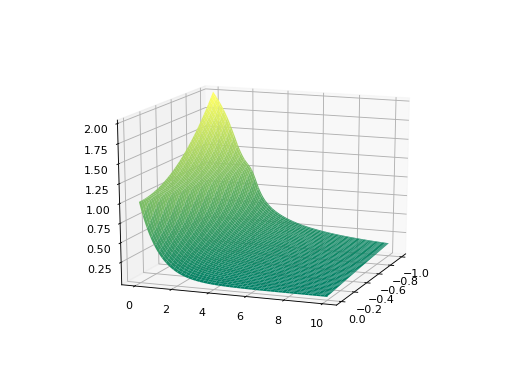

In [72]:
# %matplotlib notebook
# fig=plt.figure(figsize=(10,15))
fig = plt.figure()
ax = fig.gca(projection='3d')
# t, x = np.meshgrid(t, x)
surf = ax.plot_surface(-x, t, y, cmap='summer')
